In [40]:
import torch
import torchvision
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [41]:
train_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True,
    target_transform=None
)

test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True,
    target_transform=None
)

In [42]:
image, label = train_data[0]
print("[COLOR_CHANELS, HEIGHT, WIDTH]")
print(f"Image shape: {image.shape}")
print(f"label {label}")

[COLOR_CHANELS, HEIGHT, WIDTH]
Image shape: torch.Size([1, 28, 28])
label 9


In [43]:
print(f"Length Train: {len(train_data)} \t Length Test: {len(test_data)}")

Length Train: 60000 	 Length Test: 10000


In [44]:
print(f"train_data.classes -> Gives us class names:\n {train_data.classes}")

train_data.classes -> Gives us class names:
 ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


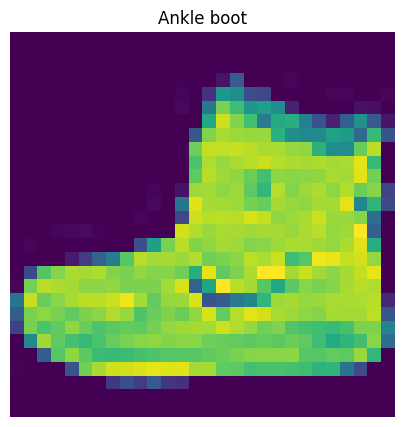

In [45]:
def plot_img(
        img_data: torch.utils.data.Dataset,
        n: int = 0
    ):

    img, label = img_data[n]
    data_class_names = img_data.classes
    target_name = data_class_names[label]

    plt.figure(figsize=(5,5))
    plt.axis("off")
    plt.title(target_name)
    plt.imshow(img.squeeze())
    plt.show()

plot_img(train_data, 0)



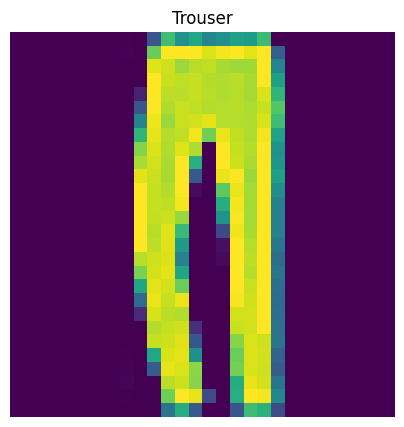

In [46]:
plot_img(test_data,2)

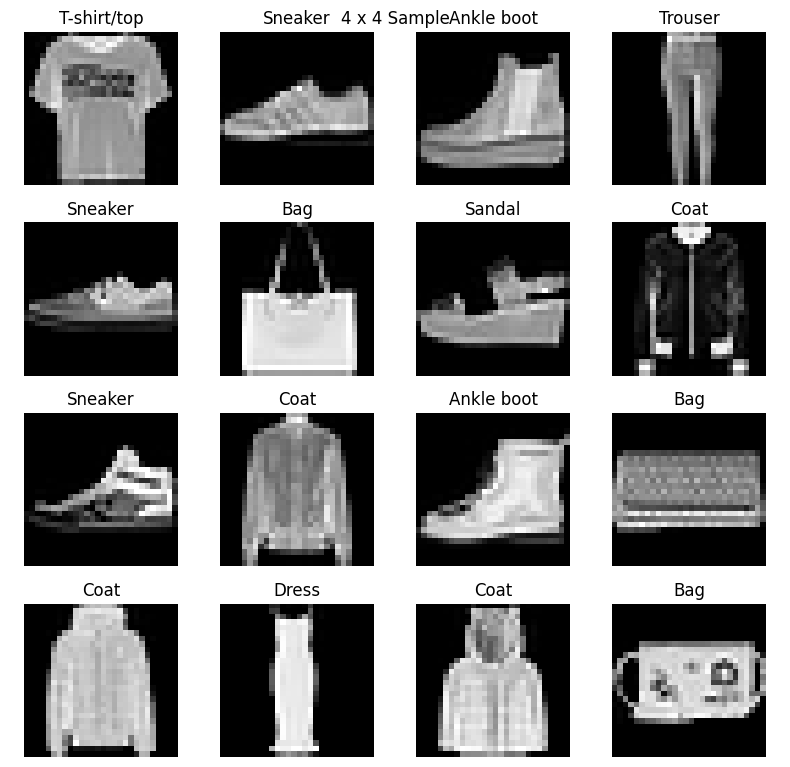

In [47]:
def plot_many_img(
    img_dataset : torch.utils.data.Dataset = train_data,
    img_per_row: int = 4,
    img_per_col: int = 4,
    figure_size: tuple = (8,8),
    random_state: int = 47,
    title: str = None,
    cmap: str = "gray"
    ):

    random.seed(random_state)
    img_num = img_per_col * img_per_row
    img_data_classes = img_dataset.classes

    plt.figure(figsize=figure_size)
    plt.axis("off")
    if title is None:
        plt.title(f"{img_per_col} x {img_per_row} Sample")
    else:
        plt.title(title)

    for i in range(img_num):
        rand_num = random.randint(0, len(img_dataset) - 1)
        img, label = img_dataset[rand_num]
        target_name = img_data_classes[label]

        plt.subplot(img_per_row,img_per_col, i+1)
        plt.imshow(img.squeeze(), cmap=cmap)
        plt.title(target_name)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

     
plot_many_img()   

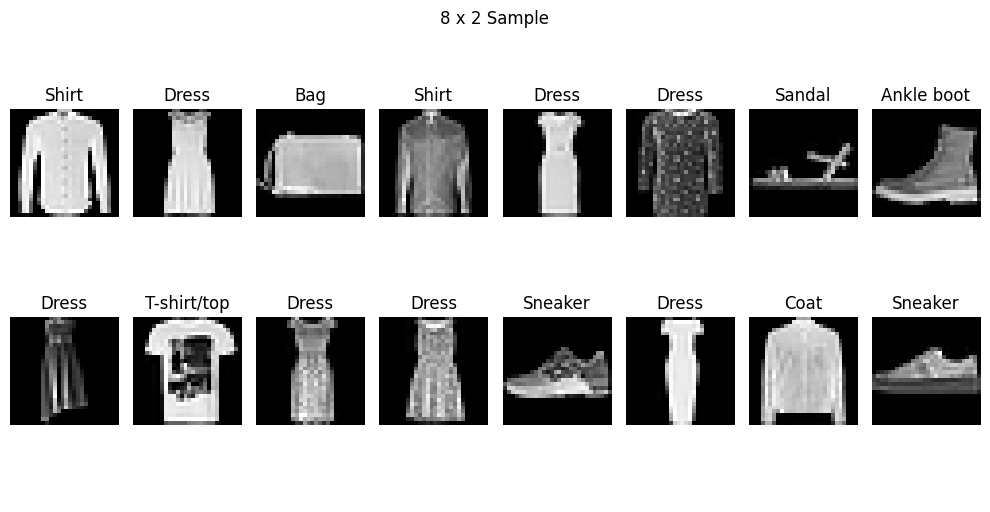

In [48]:
plot_many_img(
    img_dataset=test_data,
    img_per_col=8,
    img_per_row=2,
    figure_size=(10,5),
    random_state=108
)

In [49]:
#WHAT DOES A DATALOADER DO? IT TURNS A LARGE DATASET INTO PYTHON ITERABLE OF SMALL CHUNKS
#WHICH WE CALL 'BATCH'
BATCH_SIZE = 128

train_dataloader = torch.utils.data.DataLoader(
    dataset= train_data,
    batch_size= BATCH_SIZE,
    num_workers=8,
    shuffle=True,
)

test_dataloader = torch.utils.data.DataLoader(
    dataset= test_data,
    batch_size= BATCH_SIZE,
    num_workers=8,
    shuffle=False
)

print(f"Dataloaders: {train_dataloader} & {test_dataloader}\t#####################################")
print(f"Length of Train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}\t##################")
print(f"Length of Test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}\t##################")

Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x000002C93B0FDC90> & <torch.utils.data.dataloader.DataLoader object at 0x000002C93AF852D0>	#####################################
Length of Train dataloader: 469 batches of 128	##################
Length of Test dataloader: 79 batches of 128	##################


In [50]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"Shape of Train Features Batch: {train_features_batch.shape}")
print(f"Shape of Train Labels Batch: {train_labels_batch.shape}")

Shape of Train Features Batch: torch.Size([128, 1, 28, 28])
Shape of Train Labels Batch: torch.Size([128])


Text(0.5, 1.0, 'Shirt')

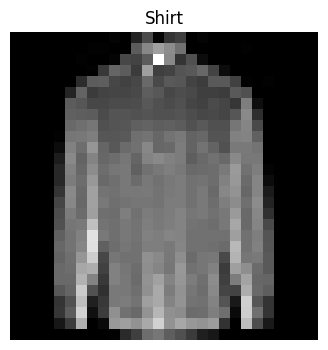

In [51]:
torch.manual_seed(57)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.figure(figsize=(4,4))
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray") #img.squeeze() : [1,28,28] -> [28,28]
plt.title(train_data.classes[label])

In [52]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape} -----> 28 x 28 = 784")


Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784]) -----> 28 x 28 = 784


In [53]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, X:torch.Tensor) -> torch.Tensor:
        return self.layer_stack(X)

In [54]:
torch.manual_seed(57)

model_0 = FashionMNISTModelV0(input_shape=28*28, hidden_units=10, output_shape=len(train_data.classes))
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [55]:
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exist, skipping download")

else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py" , "wb") as f:
        f.write(request.content)

helper_functions.py already exist, skipping download


In [56]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [89]:
from timeit import default_timer as timer 

def print_train_time(start: float, end: float, device: torch.device):
    total_time = end - start
    print(f"Train time on {device} : {total_time:.3f} seconds")
    return total_time

In [91]:
from tqdm.auto import tqdm

torch.manual_seed(57)
train_time_start_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} -------\n")

    train_loss = 0

    for batch_index, (X,y) in enumerate(train_dataloader):
        model_0.train()

        #Forward pass
        y_pred = model_0(X)

        #Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss #accumulatively add up the loss per epoch

        #Optimizer zero grad
        optimizer.zero_grad()

        #Loss backward
        loss.backward()

        #Optimizer step
        optimizer.step()

        #Print out how many samples have been seen
        if batch_index % 25 == 0:
            print(f"Looked at {batch_index * len(X)} / {len(train_dataloader.dataset)} samples")

    #After model sees whole batches, it's time to calculate train_loss
    train_loss /= len(train_dataloader)

    ###TESTING
    test_loss, test_acc = 0, 0 
    model_0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:

            #Forward pass
            test_pred = model_0(X)

            #Calculate loss
            test_loss += loss_fn(test_pred, y)

            #Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
print_train_time(start=train_time_start_on_cpu, end= train_time_end_on_cpu, device=str(next(model_0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 -------



  0%|          | 0/5 [00:04<?, ?it/s]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [68]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [67]:
def eval_model(
        model: nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: nn.Module,
        accuracy_fn = accuracy_fn,
        device : torch.device = device):
    
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss += loss_fn(y_pred, y)

            acc += accuracy_fn(y_true=y, y_pred= y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name" : model.__class__.__name__,
        "model_loss" : loss,
        "model_acc" : acc
    }

model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': tensor(0.4796, device='cuda:0'),
 'model_acc': 82.9806170886076}

In [69]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [70]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features= output_shape)
        )
    
    def forward(self, X:torch.Tensor) -> torch.Tensor:
        return self.layer_stack(X)

model_1 = FashionMNISTModelV1(input_shape=28*28, hidden_units=10, output_shape=len(train_data.classes)).to(device=device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [71]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [72]:
def train_step(
        model: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        optimizer: torch.optim.Optimizer,
        accuracy_fn,
        device: torch.device = device
):
    train_loss, train_acc = 0, 0
    model.to(device)

    for batch_index, (X,y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(
        model: nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn,
        device: torch.device = device
):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [73]:
torch.manual_seed(57)

train_time_start_on_gpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} ---------\n")

    train_step(
        model=model_1,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )

    test_step(
        model=model_1,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 ---------

Train loss: 0.99012 | Train accuracy: 63.79%


 20%|██        | 1/5 [00:15<01:02, 15.57s/it]

Test loss: 0.65307 | Test accuracy: 77.20%

Epoch: 1 ---------

Train loss: 0.59920 | Train accuracy: 78.07%


 40%|████      | 2/5 [00:30<00:45, 15.19s/it]

Test loss: 0.53259 | Test accuracy: 81.08%

Epoch: 2 ---------

Train loss: 0.52735 | Train accuracy: 81.24%


 60%|██████    | 3/5 [00:45<00:30, 15.24s/it]

Test loss: 0.52841 | Test accuracy: 81.22%

Epoch: 3 ---------

Train loss: 0.48627 | Train accuracy: 82.64%


 80%|████████  | 4/5 [01:00<00:15, 15.02s/it]

Test loss: 0.72241 | Test accuracy: 75.57%

Epoch: 4 ---------

Train loss: 0.46445 | Train accuracy: 83.32%


100%|██████████| 5/5 [01:15<00:00, 15.06s/it]

Test loss: 0.50464 | Test accuracy: 81.79%

Train time on cuda : 75.307 seconds


75.30747780000092

In [75]:
model_1_results = eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
print(model_0_results)
print("#########################################################")
print(model_1_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': tensor(0.4796, device='cuda:0'), 'model_acc': 82.9806170886076}
#########################################################
{'model_name': 'FashionMNISTModelV1', 'model_loss': tensor(0.5046, device='cuda:0'), 'model_acc': 81.7939082278481}


In [76]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidde_units: int, output_shape: int):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidde_units,
                stride=1,
                kernel_size=3,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidde_units,
                out_channels=hidde_units,
                kernel_size=3,stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)   
        )
        
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidde_units, out_channels=hidde_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidde_units, out_channels=hidde_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidde_units*7*7, out_features=output_shape)
        )
    
    def forward(self, X:torch.Tensor):
        return self.classifier(self.block2(self.block1(X)))
    

In [78]:
torch.manual_seed(57)
model_2 = FashionMNISTModelV2(input_shape=1, hidde_units=10, output_shape=len(train_data.classes)).to(device)
model_2

FashionMNISTModelV2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [81]:
torch.manual_seed(57)

images = torch.randn(size=(BATCH_SIZE, 3, 64, 64)) #(BATCHSIZE, COLOR_CHANELS, HEIGHT WIDTH)
test_image = images[0]

print(f"Image Shape: {test_image.shape}")

#WE CAN ADD BARCH_SIZE VALUE TO SINGLE EXAMPLE USING unsqueeze(dim=0) method
test_image = test_image.unsqueeze(dim=0)

print(f"Image Shape after 'unsquueze': {test_image.shape}")


Image Shape: torch.Size([3, 64, 64])
Image Shape after 'unsquueze': torch.Size([1, 3, 64, 64])


In [82]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [92]:
train_time_start_model_2 = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch :{epoch}\n-------------------------")

    train_step(
        model=model_2,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )

    test_step(
        model=model_2,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
print_train_time(start=train_time_start_model_2, end= train_time_end_model_2, device= device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch :0
-------------------------
Train loss: 1.41548 | Train accuracy: 47.25%


 20%|██        | 1/5 [00:10<00:41, 10.47s/it]

Test loss: 0.52907 | Test accuracy: 80.98%

Epoch :1
-------------------------
Train loss: 0.47390 | Train accuracy: 82.97%


 40%|████      | 2/5 [00:20<00:30, 10.31s/it]

Test loss: 0.40187 | Test accuracy: 85.52%

Epoch :2
-------------------------
Train loss: 0.39271 | Train accuracy: 85.84%


 60%|██████    | 3/5 [00:31<00:20, 10.36s/it]

Test loss: 0.37117 | Test accuracy: 86.83%

Epoch :3
-------------------------
Train loss: 0.35777 | Train accuracy: 87.05%


 80%|████████  | 4/5 [00:41<00:10, 10.38s/it]

Test loss: 0.32265 | Test accuracy: 88.43%

Epoch :4
-------------------------
Train loss: 0.33325 | Train accuracy: 88.19%


100%|██████████| 5/5 [00:52<00:00, 10.42s/it]

Test loss: 0.32994 | Test accuracy: 88.04%

Train time on cuda : 52.079 seconds


52.078851099999156

In [93]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.3598, device='cuda:0'),
 'model_acc': 87.06487341772151}

In [104]:
df = pd.DataFrame([model_0_results, model_1_results, model_2_results])
df["device"] = df["model_loss"].apply(lambda x: str(x.device))
df["model_loss"] = df["model_loss"].apply(lambda x: x.item())
df.head()

,model_name,model_loss,model_acc,device
0,FashionMNISTModelV0,0.479593,82.980617,cuda:0
1,FashionMNISTModelV1,0.504636,81.793908,cuda:0
2,FashionMNISTModelV2,0.359812,87.064873,cuda:0


In [127]:
import torchvision.transforms as transforms
data_augmentation_transform = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor()
])

In [128]:
train_data_v2 = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    transform= data_augmentation_transform,
    download=True
)

train_dataloader_v2 = torch.utils.data.DataLoader(
    dataset=train_data_v2,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=8,
)

In [119]:
model_2_augmented = FashionMNISTModelV2(input_shape=1, hidde_units=10, output_shape=len(train_data.classes)).to(device)
model_2_augmented

FashionMNISTModelV2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [129]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2_augmented.parameters(), lr=0.1)

In [130]:
train_time_start_model_2 = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch :{epoch}\n-------------------------")

    train_step(
        model=model_2_augmented,
        data_loader=train_dataloader_v2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )

    test_step(
        model=model_2_augmented,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
print_train_time(start=train_time_start_model_2, end= train_time_end_model_2, device= device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch :0
-------------------------
Train loss: 0.55841 | Train accuracy: 79.53%


 20%|██        | 1/5 [00:10<00:40, 10.19s/it]

Test loss: 0.38199 | Test accuracy: 85.96%

Epoch :1
-------------------------
Train loss: 0.50977 | Train accuracy: 81.14%


 40%|████      | 2/5 [00:20<00:30, 10.24s/it]

Test loss: 0.38618 | Test accuracy: 86.28%

Epoch :2
-------------------------
Train loss: 0.48104 | Train accuracy: 82.12%


 60%|██████    | 3/5 [00:30<00:20, 10.35s/it]

Test loss: 0.40417 | Test accuracy: 84.38%

Epoch :3
-------------------------
Train loss: 0.46715 | Train accuracy: 82.64%


 80%|████████  | 4/5 [00:41<00:10, 10.38s/it]

Test loss: 0.39586 | Test accuracy: 85.32%

Epoch :4
-------------------------
Train loss: 0.45989 | Train accuracy: 82.93%


100%|██████████| 5/5 [00:51<00:00, 10.39s/it]

Test loss: 0.41356 | Test accuracy: 84.26%

Train time on cuda : 51.972 seconds


51.971589100008714

In [131]:
model_2_augmented_results = eval_model(
    model=model_2_augmented,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_augmented_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': tensor(0.4136, device='cuda:0'),
 'model_acc': 84.25632911392405}

In [132]:
df.head()

,model_name,model_loss,model_acc,device
0,FashionMNISTModelV0,0.479593,82.980617,cuda:0
1,FashionMNISTModelV1,0.504636,81.793908,cuda:0
2,FashionMNISTModelV2,0.359812,87.064873,cuda:0
